<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **22.4 Numerical Error and Instability**

When it comes to integration schemes for ODEs, there are two issues that come into consideration - accuracy and stability.


What is **accuracy**? It refers to a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size ℎ.


What is **stability**? The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable.


Some integration schemes are stable for certain choices of ℎ and unstable for others; these integration schemes are also referred to as unstable.

***Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0,5] in increments of 0.1 and for an initial solution of $S_0 = \left[\begin{array}{c} 1\\0 \end{array}\right]$. For the model parameters using $\sqrt{\frac{g}{l}} = 4$. Plot the approximate solution on a single graph.***

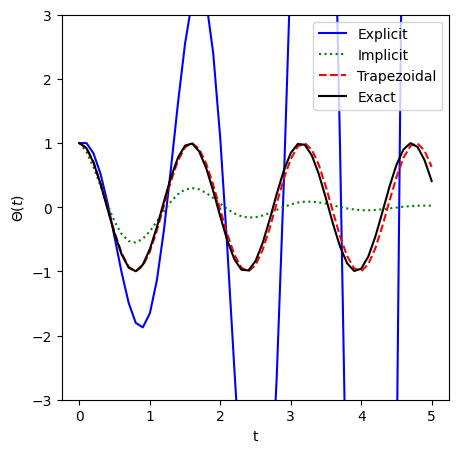

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (5, 5))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

We look at the graph above at the comparisons of numerical solution to the pendulum problem. We can observe that the exact solution is a pure cosine wave whereas the Explicit Euler scheme is unstable. The Implicit Euler scheme decays exponentially, which is incorrect. It is the Trapezoidal method that captures the solution correctly, with a small phase shift as time increases.

# **22.5 Predictor-Corrector and Runge Kutta Methods**

## **Predictor-Corrector Methods**

Given any time and state value, the function, 𝐹(𝑡,𝑆(𝑡)), returns the change of state $\frac{dS(t)}{dt}$.


**Predictor-corrector methods** of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the 𝐹 function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state. It uses two formulas: the **predictor** and **corrector**.

The predictor is an explicit formula and first estimates the solution at $𝑡_{𝑗+1}$. After we obtain the solution 𝑆($𝑡_{𝑗+1}$), we can apply the corrector to improve the accuracy. Using the found 𝑆($𝑡_{𝑗+1})$ on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.

## **Runge Kutta Methods**

This is one of the most commonly used methods for solving ODEs.The Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear. But, we can improve the accuracy of numerical integration if we can keep more terms of the series. The catch is that in order to get more of an accurate solution, we need to derive some expressions.To avoid doing this, the Runge Kutta methods can be used where computation of higher derivatives are not required.

### **Second order Runge Kutta method**

$\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+ph, S(t_j)+qhk_1\right)\\
\end{eqnarray*}$

$S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h$

### **Fourth-order Runge Kutta method**

For a higher order of accuracy, the fourth-order Runge Kutta (RK4) method is a classical method used for integrating ODEs. It is also obtained from the Taylor seres.

$S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).$

# **22.6 Python ODE Solvers**

There are many in-built functions for solving IVPs in *scipy*. The most commonly used one is the *scipy.integrate.solve_ivp* function.

How to use the solver to solvee the differential equation? *solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)*

where 𝑓𝑢𝑛 takes in the function in the right-hand side of the system. 𝑡_𝑠𝑝𝑎𝑛 is the interval of integration (𝑡0,𝑡𝑓), where 𝑡0 is the start and 𝑡𝑓 is the end of the interval. 𝑠0 is the initial state. There are a couple of methods that we can choose, the default is ‘RK45’, which is the explicit Runge-Kutta method of order 5(4).

***Consider the ODE $\frac{dS(t)}{dt}=\cos(t)$ for an initial value $𝑆_0=0$. The exact solution to this problem is 𝑆(𝑡)=sin(𝑡). Use solve_ivp to approximate the solution to this initial value problem over the interval [0,𝜋]. Plot the approximate solution versus the exact solution and the relative error over time.***

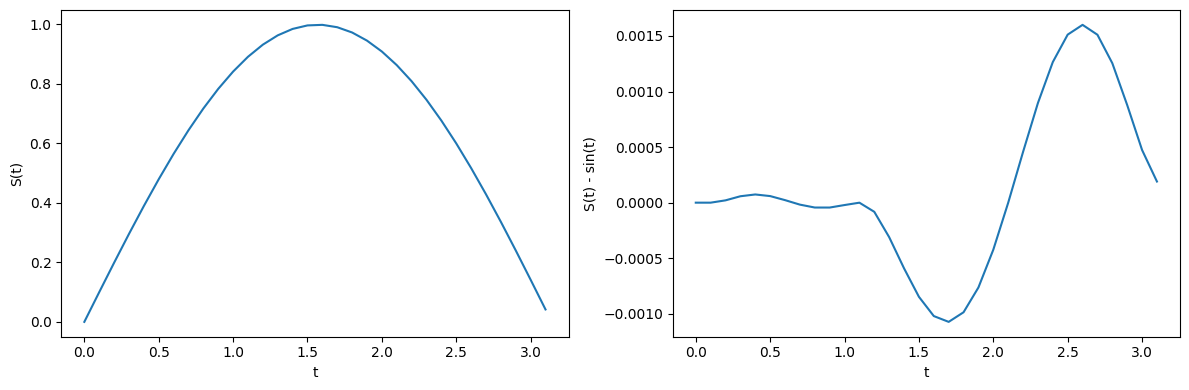

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

We can see in the left figure the integration of cos(t) with *solve_ivp*. The right figure shows the computation of the difference between the solution of the integration by *solve_ivp* and the evaluation of the analytical solution to this ODE. It can be observed that the difference between the approximate and exact solution to this ODE is small.

***Using the rtol and atol to make the difference between the approximate and exact solution is less than 1e-7.***

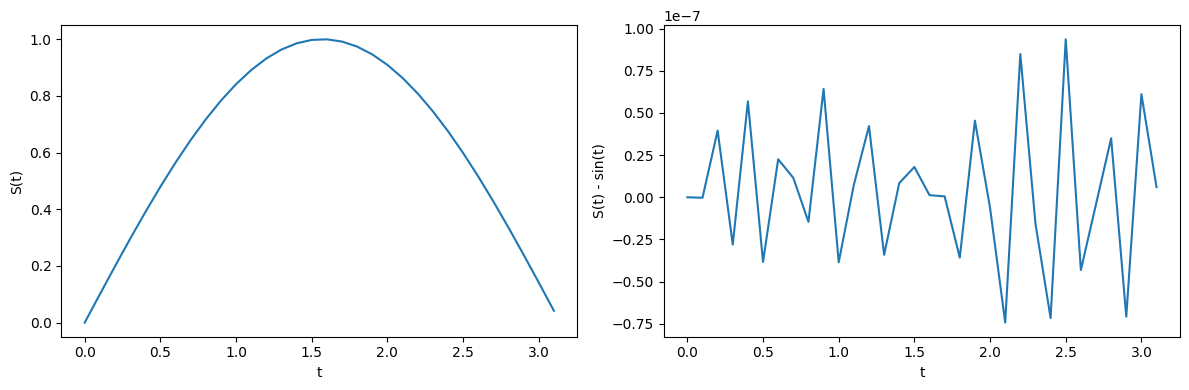

In [8]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

***Consider the ODE $\frac{dS(t)}{dt} = -S(t),$, with an initial value of $𝑆_0=1$. The exact solution to this problem is $𝑆(𝑡)=𝑒^{−𝑡}$. Use solve_ivp to approximate the solution to this initial value problem over the interval [0,1]. Plot the approximate solution versus the exact solution, and the relative error over time.***

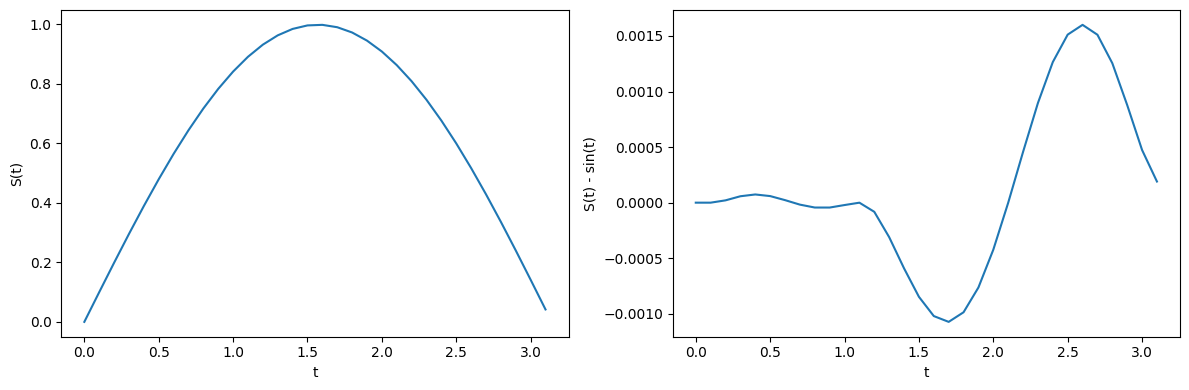

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

We can see again the difference between the result of *solve_ivp* and the evaluation of the analytical solution by Python is quite small in comparison to the value of the function.

***Let the state of a system be defined by $S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$, and let the evolution of the system be defined by the ODE***
***$\begin{split}
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
\end{split}$.
Use solve_ivp to solve this ODE for the time interval [0,10] with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$. Plot the solution in (𝑥(𝑡),𝑦(𝑡)).***

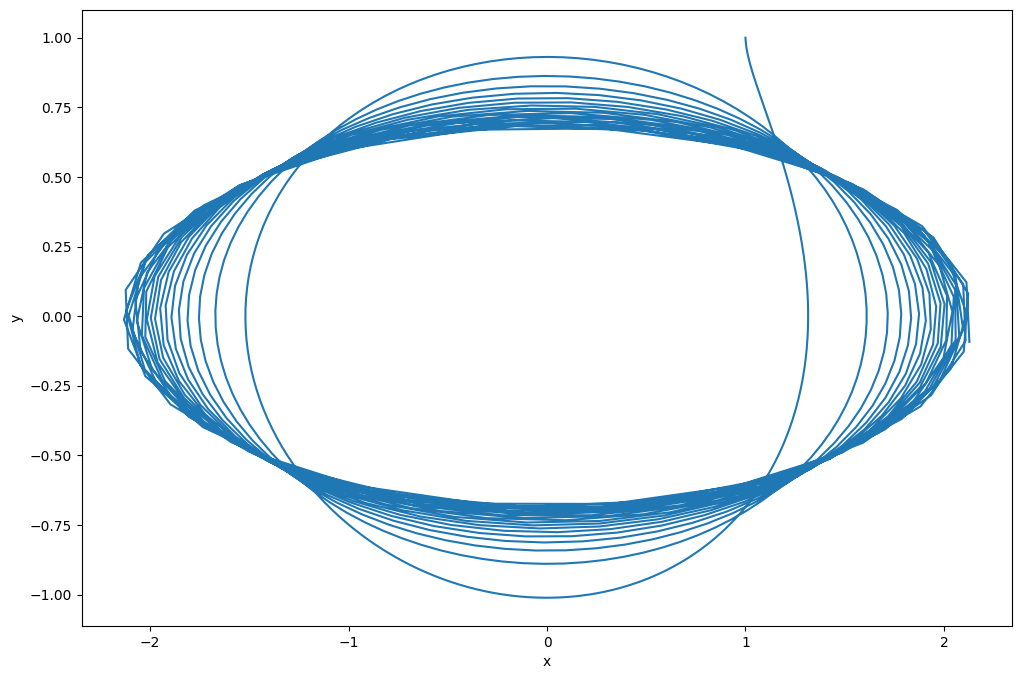

In [6]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()